In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator


from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
#extract=True는 zip 파일의 압축을 푼다.

In [3]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

'C:\\Users\\Dong-Woo\\.keras\\datasets\\cats_and_dogs_filtered'

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
batch_size = 100
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

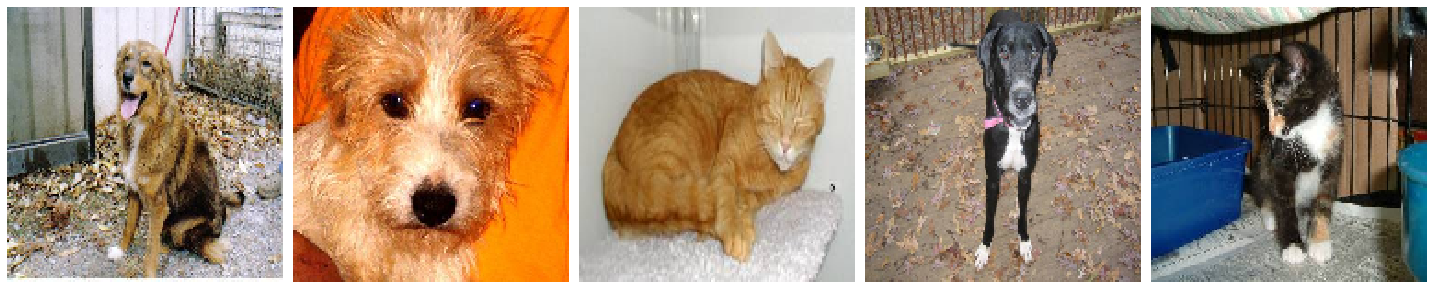

In [14]:
plotImages(sample_training_images[:5])

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [16]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4624)             

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
20/20 [==============================] - 4s 219ms/step - loss: 0.7304 - accuracy: 0.5075 - val_loss: 0.6913 - val_accuracy: 0.5420
Epoch 2/10
20/20 [==============================] - 3s 147ms/step - loss: 0.6793 - accuracy: 0.5650 - val_loss: 0.6714 - val_accuracy: 0.6400
Epoch 3/10
20/20 [==============================] - 3s 152ms/step - loss: 0.6474 - accuracy: 0.6735 - val_loss: 0.6224 - val_accuracy: 0.6260
Epoch 4/10
20/20 [==============================] - 3s 152ms/step - loss: 0.5785 - accuracy: 0.7045 - val_loss: 0.6562 - val_accuracy: 0.6910
Epoch 5/10
20/20 [==============================] - 3s 151ms/step - loss: 0.5431 - accuracy: 0.7265 - val_loss: 0.6009 - val_accuracy: 0.6950
Epoch 6/10
20/20 [==============================] - 3s 153ms/step - loss: 0.5279 - accuracy: 0.7485 - val_loss: 0.5669 - val_accuracy: 0.6690
Epoch 7/10
20/20 [==============================] - 3s 153ms/step - loss: 0.4375 - accuracy: 0.7925 - val_loss: 0.5590 - val_accuracy: 0.7150
Epoch 

In [20]:
def draw_plot(hist):
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

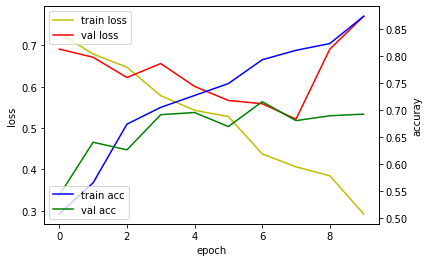

In [21]:
draw_plot(history)

In [22]:
from keras.preprocessing import image

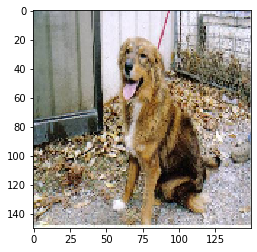

In [23]:
plt.imshow(np.squeeze(sample_training_images[:1]))

In [24]:
model.predict_classes(sample_training_images[:1])

array([[1]])

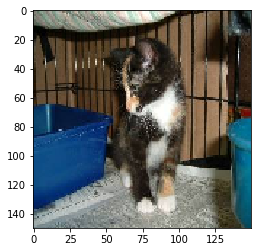

In [25]:
plt.imshow(np.squeeze(sample_training_images[4:5]))

In [26]:
model.predict_classes(sample_training_images[4:5])

array([[0]])

In [28]:
test_data = image.load_img('./test_dog.jpg', target_size=(IMG_HEIGHT,IMG_WIDTH))
test_data = image.img_to_array(test_data)
test_data = np.expand_dims(test_data, axis=0)
test_data = test_data / 255.0

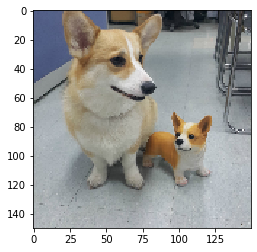

In [33]:
plt.imshow(np.squeeze(test_data))

In [29]:
model.predict_classes(test_data)

array([[1]])

In [30]:
test_data2 = image.load_img('./test_cat.jpg', target_size=(IMG_HEIGHT,IMG_WIDTH))
test_data2 = image.img_to_array(test_data2)
test_data2 = np.expand_dims(test_data2, axis=0)
test_data2 = test_data2 / 255.0

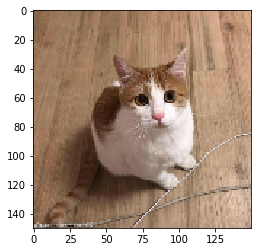

In [34]:
plt.imshow(np.squeeze(test_data2))

In [31]:
model.predict_classes(test_data2)

array([[0]])